<a href="https://colab.research.google.com/github/utkuyucel/Deep-Learning/blob/master/Building_Some_Models_%3E_%22DNA%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras import layers
from keras.layers import Dense, Input, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, concatenate, Dropout, Conv1D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils, to_categorical, plot_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.datasets import cifar10 
import keras

In [0]:
## THE DATASET PART ##
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [0]:
def block(X_input):
  
  X = Conv2D(16, (1,1), padding = "same")(X_input)
  X = Activation("relu")(X)
  X = Conv2D(16, (3,3), padding = "same")(X)
  X = Activation("relu")(X)
    
  
  Y = Conv2D(16, (1,1), padding = "same")(X_input)
  Y = Activation("relu")(Y)
  Y = Conv2D(16, (5,5), padding = "same")(Y)
  Y = Activation("relu")(Y)
    
  Z = MaxPooling2D((3,3), strides = (1,1), padding = "same")(X_input)
  Z = Conv2D(16, (1,1), padding = "same")(Z)
  Z = Activation("relu")(Z)
   
  out = keras.layers.concatenate([X,Y,Z])
  return out

In [0]:
def model(X_input = (32,32,3)):
  
  X_input = Input(X_input)
  X = Conv2D(16, (5,5), strides = (1,1), padding = "same")(X_input)
  X = Activation("relu")(X)
  
  X1 = block(X)
  X2 = block(X1)
  X3 = block(X2)
  
  X3 = Activation("relu")(X2)
  
  X4 = block(X3)
  X5 = block(X4)
  X6 = block(X5)
  
  X6 = Activation("relu")(X5)
  
  X7 = block(X6)
  X8 = block(X7)
  X9 = block(X8)
  
  X9 = Activation("relu")(X8)
  
  
  L4 = keras.layers.add([X1,X2,X3,X4,X5,X6,X7,X8,X9])
  
  X = BatchNormalization()(L4)
  X = Activation("relu")(X)
  
  X = AveragePooling2D()(X)
  
  X = Flatten()(X)
  X = Dense(10, activation = "softmax")(X)
  
  model = Model(inputs = X_input, outputs = X)
  
  return model

In [0]:
model = model((32,32,3))

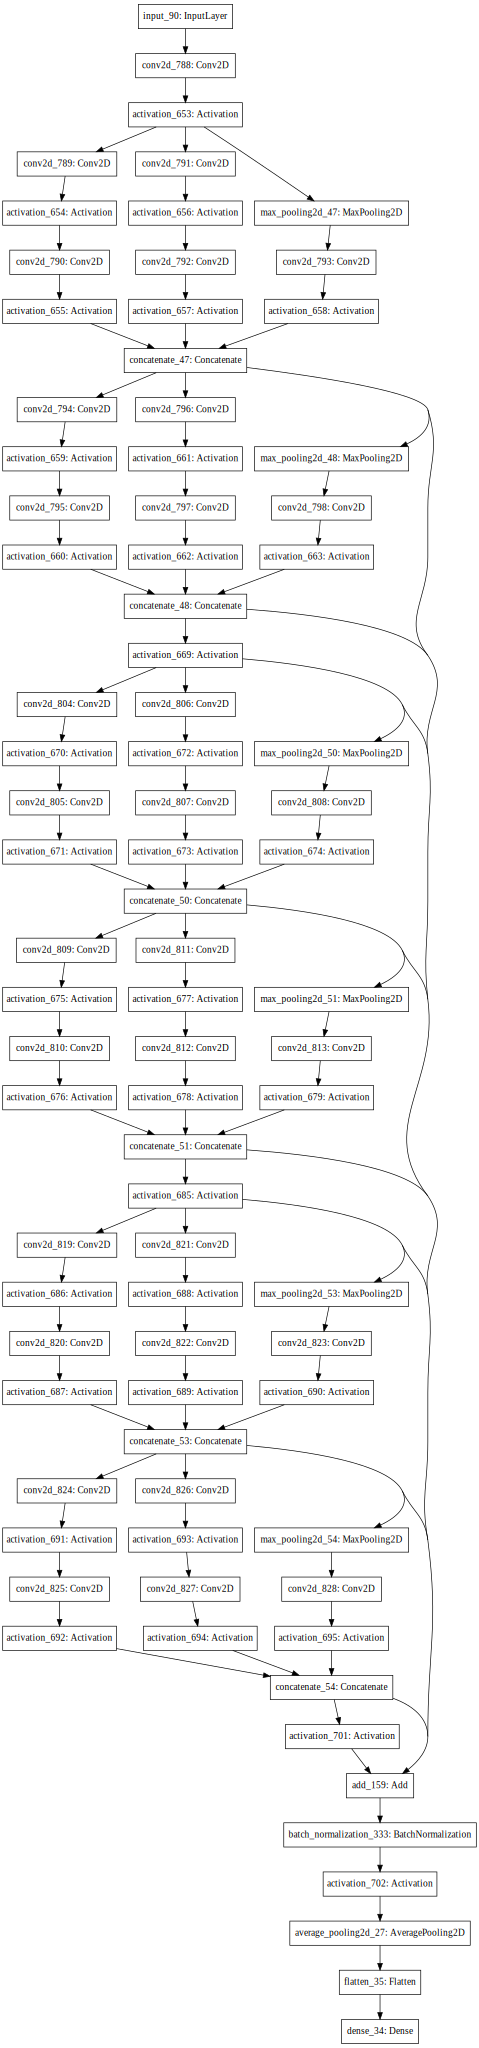

In [240]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [0]:

model.summary()

In [0]:
model.load_weights("model.h5")

In [0]:
model.compile("adam", "categorical_crossentropy", metrics = ["accuracy"])

In [242]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 50, validation_data = (X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 72s 1ms/step - loss: 1.4402 - acc: 0.5116 - val_loss: 2.2086 - val_acc: 0.3931
Epoch 2/25
50000/50000 [==============================] - 45s 898us/step - loss: 1.0093 - acc: 0.6493 - val_loss: 2.0908 - val_acc: 0.4559
Epoch 3/25
50000/50000 [==============================] - 45s 893us/step - loss: 0.8730 - acc: 0.6961 - val_loss: 2.0186 - val_acc: 0.4820
Epoch 4/25
50000/50000 [==============================] - 44s 883us/step - loss: 0.7750 - acc: 0.7318 - val_loss: 1.4578 - val_acc: 0.5496
Epoch 5/25
50000/50000 [==============================] - 44s 888us/step - loss: 0.6881 - acc: 0.7603 - val_loss: 1.3668 - val_acc: 0.5843
Epoch 6/25
50000/50000 [==============================] - 44s 884us/step - loss: 0.6140 - acc: 0.7855 - val_loss: 1.1858 - val_acc: 0.6309
Epoch 7/25
50000/50000 [==============================] - 44s 883us/step - loss: 0.5547 - acc: 0.8069 - val_loss: 1.11

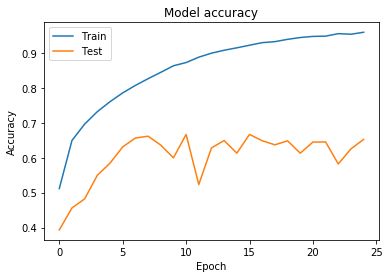

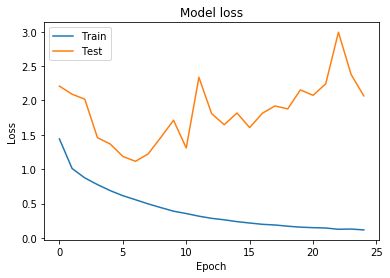

In [243]:

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.save_weights("model.h5")